<a href="https://colab.research.google.com/github/AmirKh20/Adult-Clustering/blob/master/Adult_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adult Data Set

In this lab, I used the [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult) from UCI Machine learning repository.

The objective of this lab is to cluster people in this dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [ ]:
with urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names') as f:
    adult_descr = f.readlines()

In [ ]:
print(''.join([line.decode('utf-8') for line in adult_descr]))

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [ ]:
names = [name.decode('utf-8').split(':')[0] for name in adult_descr[-14:]] + ['income']
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [ ]:
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=names, skipinitialspace=True, na_values='?')
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', names=names, skipinitialspace=True, na_values='?', skiprows=1)
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       15318 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      15315 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16007 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


We can see there are some null values and many of the features are objects

First delete the dot(.) character at the end of `income` column from df2:

In [ ]:
df2['income'] = df2['income'].apply(lambda x: x[:-1])

Combine the two dataset into one:

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
workclass,46043,8,Private,33906
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
occupation,46033,14,Prof-specialty,6172
relationship,48842,6,Husband,19716
race,48842,5,White,41762
sex,48842,2,Male,32650
native-country,47985,41,United-States,43832
income,48842,2,<=50K,37155


Check the null values:

In [ ]:
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

Imputing the null values with 'missing':

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
imputed_columns = ['workclass', 'occupation', 'native-country']
imputer = make_column_transformer(
    (SimpleImputer(strategy='constant', fill_value='missing'), imputed_columns),
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [ ]:
X = pd.DataFrame(imputer.fit_transform(df), columns=imputer.get_feature_names_out()).convert_dtypes(convert_string=False)

In [ ]:
X.dtypes

workclass         object
occupation        object
native-country    object
age                Int64
fnlwgt             Int64
education         object
education-num      Int64
marital-status    object
relationship      object
race              object
sex               object
capital-gain       Int64
capital-loss       Int64
hours-per-week     Int64
income            object
dtype: object

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [ ]:
X.describe(include='object').T

,count,unique,top,freq
workclass,48842,9,Private,33906
occupation,48842,15,Prof-specialty,6172
native-country,48842,42,United-States,43832
education,48842,16,HS-grad,15784
marital-status,48842,7,Married-civ-spouse,22379
relationship,48842,6,Husband,19716
race,48842,5,White,41762
sex,48842,2,Male,32650
income,48842,2,<=50K,37155


In [ ]:
X['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
missing              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
X['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
missing              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
X['native-country'].value_counts()

United-States                 43832
Mexico                          951
missing                         857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

There are some duplicates but we don't care about it since this is just a clustering:

In [ ]:
X.duplicated().sum()

52

In [ ]:
X[X.duplicated()].head()

,workclass,occupation,native-country,age,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
4881,Private,Craft-repair,Mexico,25,308144,Bachelors,13,Never-married,Not-in-family,White,Male,0,0,40,<=50K
5104,Private,Other-service,United-States,90,52386,Some-college,10,Never-married,Not-in-family,Asian-Pac-Islander,Male,0,0,35,<=50K
9171,Private,Prof-specialty,United-States,21,250051,Some-college,10,Never-married,Own-child,White,Female,0,0,10,<=50K
11631,Private,Tech-support,United-States,20,107658,Some-college,10,Never-married,Not-in-family,White,Female,0,0,10,<=50K
13084,Private,Priv-house-serv,Guatemala,25,195994,1st-4th,2,Never-married,Not-in-family,White,Female,0,0,40,<=50K


In [ ]:
X['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [ ]:
X['education-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: education-num, dtype: Int64

These two columns are exactly the same. so drop one of them:

In [ ]:
X.drop('education', axis=1, inplace=True)

In [ ]:
categorical_features = X.columns.values[X.dtypes == 'object']
numerical_features = X.columns.values[X.dtypes != 'object']

In [ ]:
categorical_features

array(['workclass', 'occupation', 'native-country', 'marital-status',
       'relationship', 'race', 'sex', 'income'], dtype=object)

In [ ]:
numerical_features

array(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'], dtype=object)

In [ ]:
{feature: X[feature].unique() for feature in categorical_features}

{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
        'Local-gov', 'missing', 'Self-emp-inc', 'Without-pay',
        'Never-worked'], dtype=object),
 'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
        'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
        'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
        'Tech-support', 'missing', 'Protective-serv', 'Armed-Forces',
        'Priv-house-serv'], dtype=object),
 'native-country': array(['United-States', 'Cuba', 'Jamaica', 'India', 'missing', 'Mexico',
        'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
        'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
        'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
        'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
        'China', 'Japan', 'Yugoslavia', 'Peru',
        'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&To

In [ ]:
import seaborn as sns

## Histogram plots:

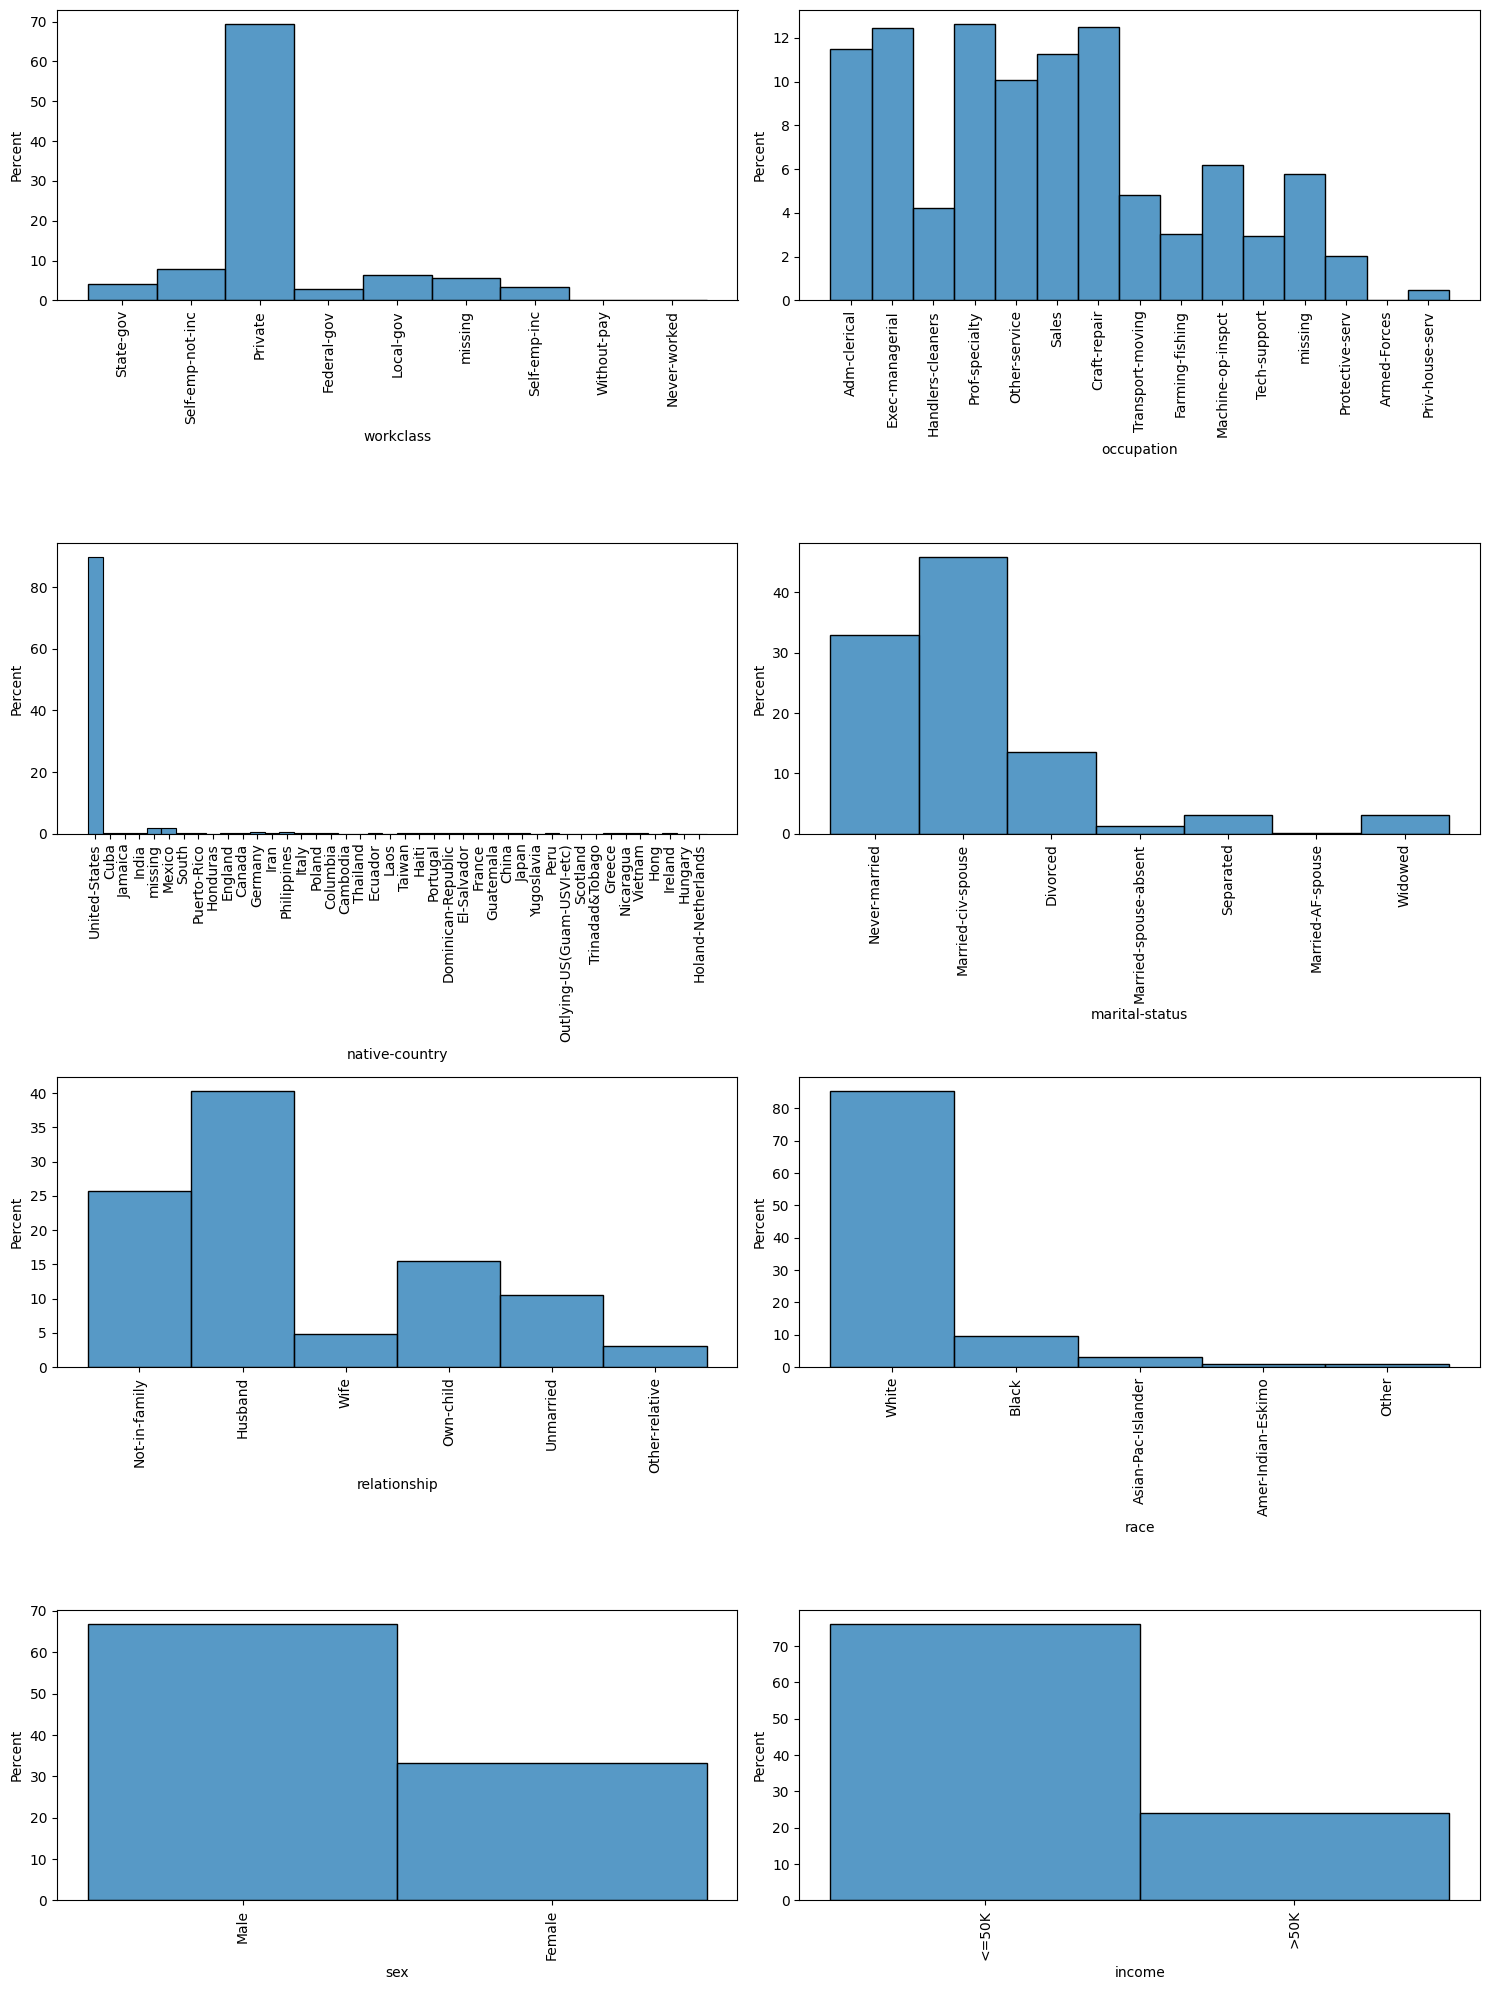

In [ ]:
_, axes = plt.subplots(4, 2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.4)

for i, ax in enumerate(axes.flatten()):
    sns.histplot(data=X, x=categorical_features[i], stat='percent', ax=ax)
    ax.tick_params(axis="x", rotation=90)
plt.tight_layout()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name

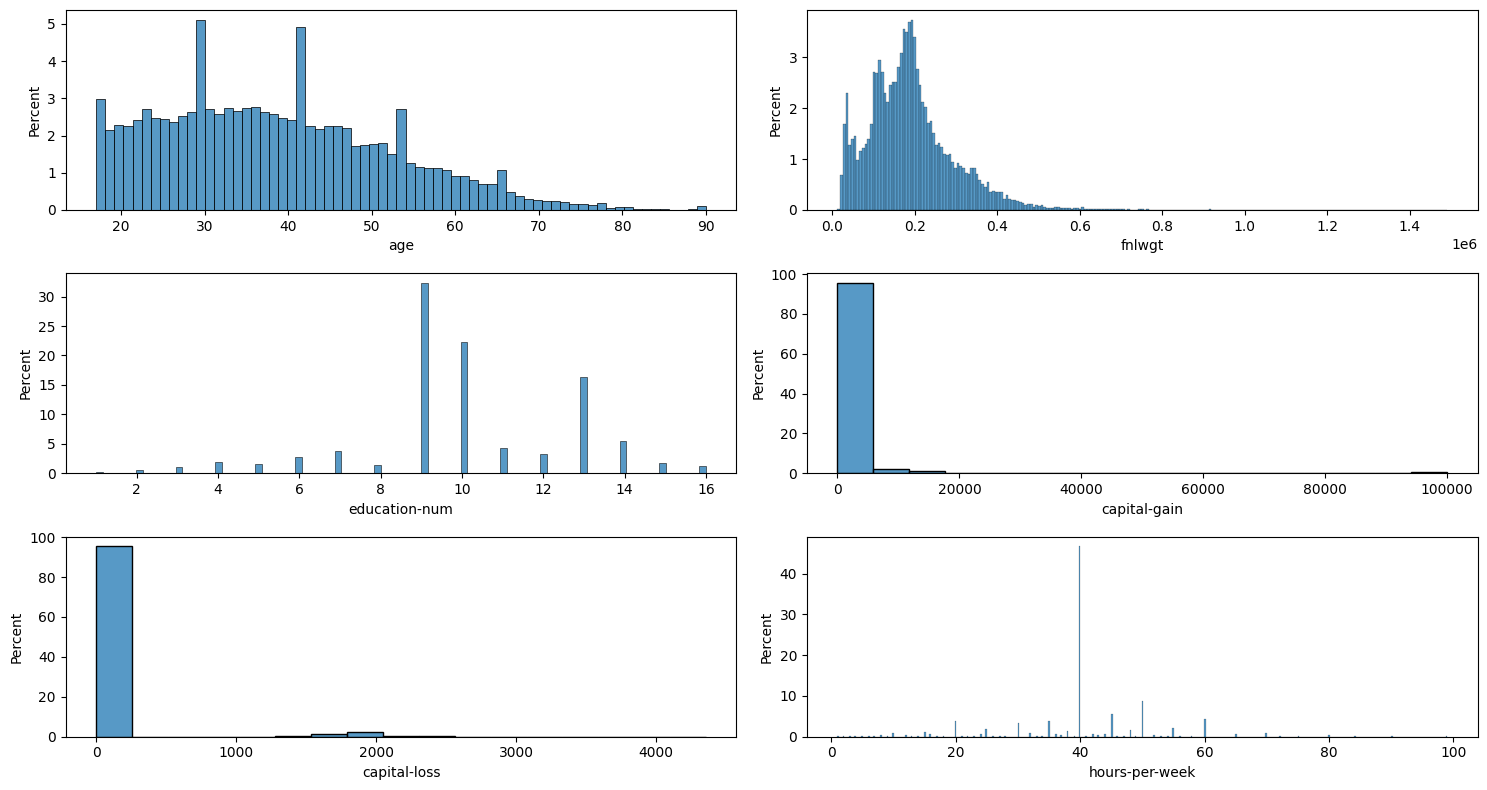

In [ ]:
_, axes = plt.subplots(3, 2, figsize=(15, 8))

for i, ax in enumerate(axes.flatten()):
    sns.histplot(data=X, x=numerical_features[i], stat='percent', ax=ax)
plt.tight_layout()

## Correlations:

<Axes: >

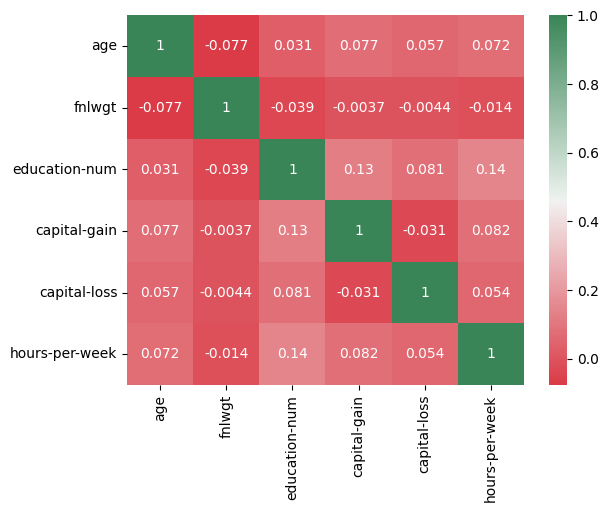

In [ ]:
cmap = sns.diverging_palette(10, 500, as_cmap=True)
sns.heatmap(X.corr(), annot=True, cmap=cmap)

In [ ]:
corr = X.corr()

for i in range(corr.shape[0]):
    corr.iloc[i, i] = 0
corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,0.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,0.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,0.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,0.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,0.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,0.000000


Most correlated features are:

In [ ]:
corr.abs().idxmax()

age                 capital-gain
fnlwgt                       age
education-num     hours-per-week
capital-gain       education-num
capital-loss       education-num
hours-per-week     education-num
dtype: object

## Box plots:

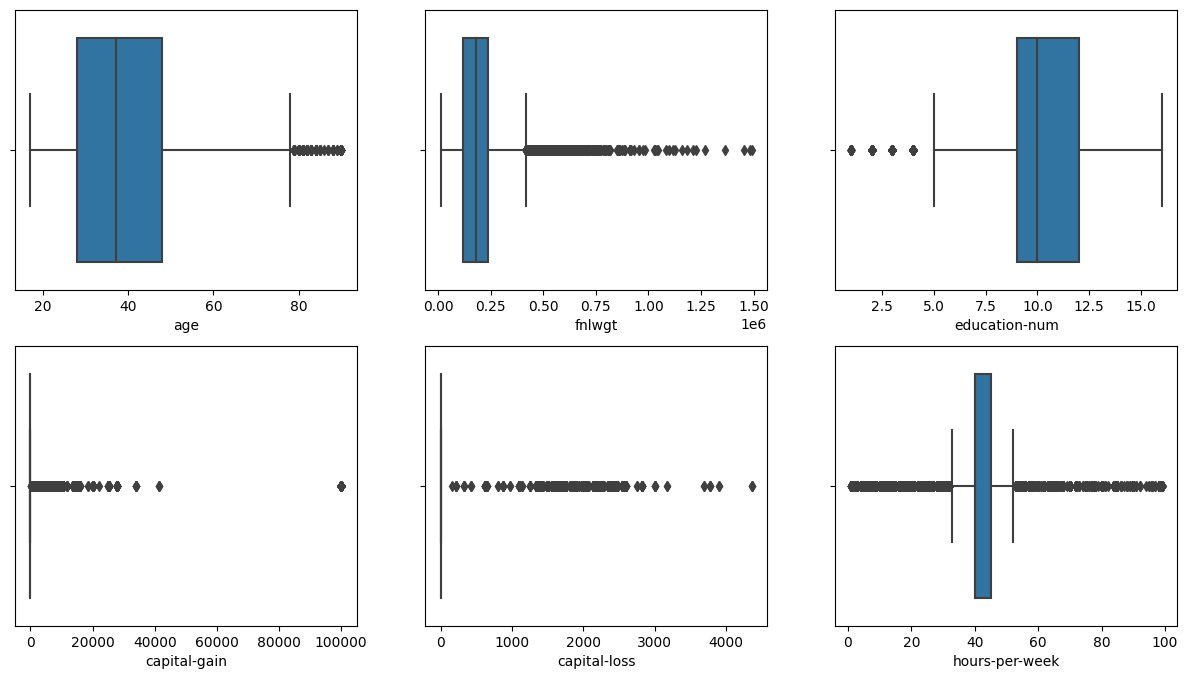

In [ ]:
_, axes = plt.subplots(2, 3, figsize=(15, 8))

for i, ax in enumerate(axes.flatten()):
    sns.boxplot(data=X, x=numerical_features[i], ax=ax)

There are many outliers!

## Pairplots:

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name

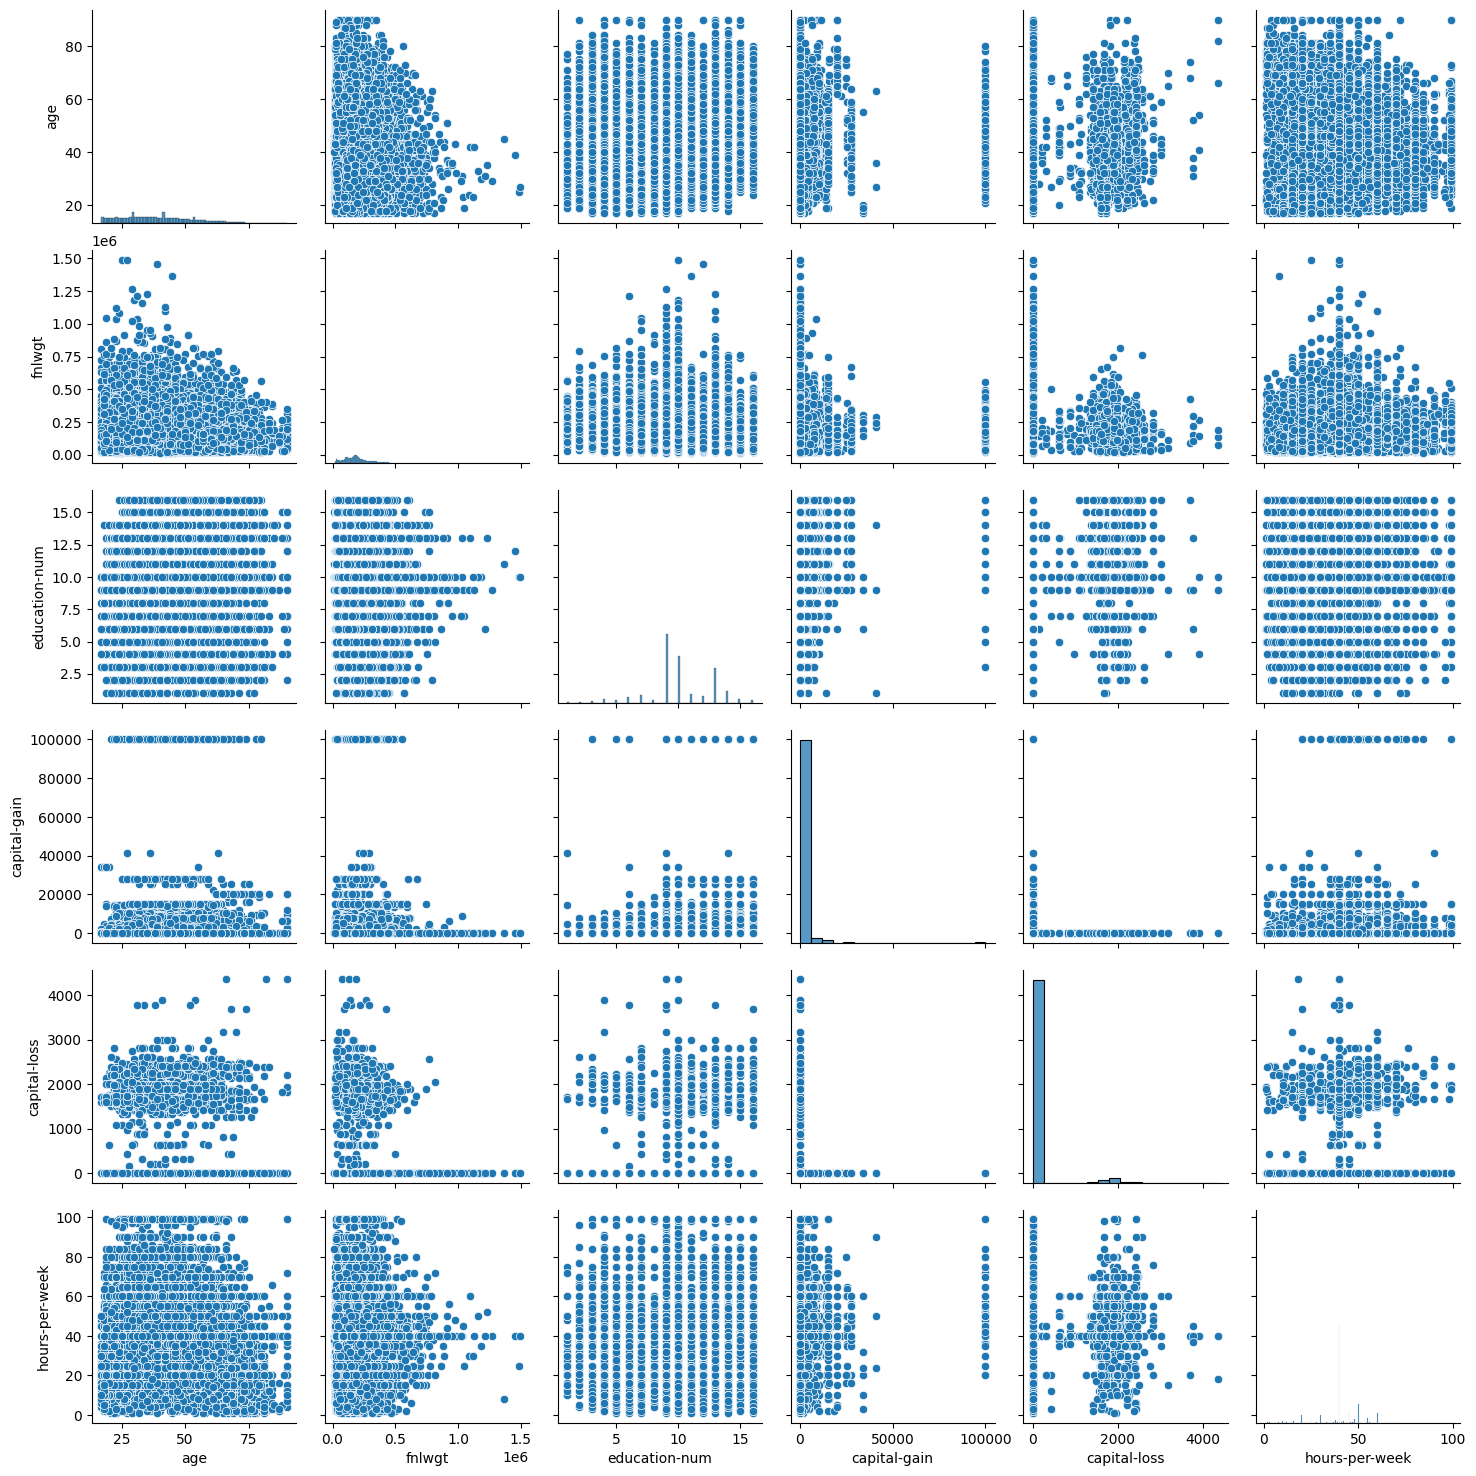

In [ ]:
sns.pairplot(X[numerical_features])

# Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
numerical_idx = np.where(X.columns.isin(numerical_features))[0]
categorical_idx = np.where(X.columns.isin(categorical_features))[0]

In [ ]:
encode_scale_after_impute = make_column_transformer(
    (StandardScaler(), numerical_idx),
    (OneHotEncoder(sparse_output=False), categorical_idx),
    verbose_feature_names_out=False,
)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

In [ ]:
pca.fit(encode_scale_after_impute.fit_transform(X))

PCA()

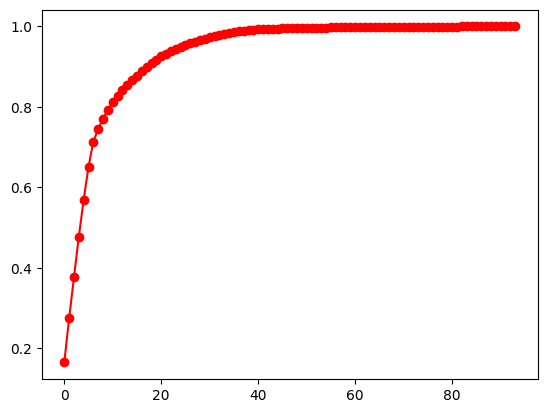

In [ ]:
plt.plot(pca.explained_variance_ratio_.cumsum(), 'ro-')

In [ ]:
n_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.90)+1

In [ ]:
n_components

19

In [ ]:
rs=42

In [ ]:
def make_fit_pipeline(model, X, n_components_):
    pipeline = Pipeline([
        ('imputer', imputer),
        ('encode-scale', encode_scale_after_impute),
        ('pca', PCA(n_components=n_components_, random_state=rs)),
        ('cluster', model),
    ])
    pipeline.fit(X)
    return pipeline

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans_pipe = make_fit_pipeline(KMeans(n_clusters=4, n_init=10), df.drop('education', axis=1), n_components)

In [ ]:
kmeans_pipe[-1].inertia_

304721.96276226186

In [ ]:
def inverse_transform(pipeline, X):
    pca_inverted = pipeline.named_steps['pca'].inverse_transform(X)
    scaler_inverted = pipeline.named_steps['encode-scale'].named_transformers_['standardscaler'].inverse_transform(pca_inverted[:, :len(numerical_features)])
    onehot_inverted = pipeline.named_steps['encode-scale'].named_transformers_['onehotencoder'].inverse_transform(pca_inverted[:, len(numerical_features):])
    return pd.DataFrame(np.concatenate([scaler_inverted, onehot_inverted], axis=1), columns=np.concatenate([numerical_features, categorical_features]))


In [ ]:
km_cluster_centers = kmeans_pipe[-1].cluster_centers_

Our kmeans cluster centers are:

In [ ]:
inverse_transform(kmeans_pipe, km_cluster_centers)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,occupation,native-country,marital-status,relationship,race,sex,income
0,30.563404,200748.168665,9.56512,167.534601,0.802561,36.010341,Private,Adm-clerical,United-States,Never-married,Not-in-family,White,Female,<=50K
1,46.086247,179104.070491,10.456764,1039.464498,0.335232,44.312331,Private,Exec-managerial,United-States,Married-civ-spouse,Husband,White,Male,<=50K
2,41.775669,188318.081134,10.998401,-0.618211,1898.791354,43.343278,Private,Exec-managerial,United-States,Married-civ-spouse,Husband,White,Male,>50K
3,46.605592,185535.424581,13.02661,99995.703471,-0.030212,50.467149,Private,Prof-specialty,United-States,Married-civ-spouse,Husband,White,Male,>50K


In [ ]:
pipeline_preprocessor = Pipeline([
    ('imputer', imputer),
    ('encode-scale', encode_scale_after_impute),
    ('pca', PCA(n_components=n_components, random_state=rs)),
])

In [ ]:
X_preprocessed = pipeline_preprocessor.fit_transform(df.drop('education', axis=1))

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan_pipe = make_fit_pipeline(DBSCAN(eps=2), df.drop('education', axis=1), n_components)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X_preprocessed, dbscan_pipe[-1].labels_)

0.34542659218315613

In [ ]:
silhouette_score(X_preprocessed, kmeans_pipe[-1].labels_)

0.14432911167042783

# Results

We can say from above results that dbscan did a better job.

# Next steps

For our next steps we can try using other clustering algorithms like hierarchical clustering and using other methods for domensiluty reduction.

Unfortunatly I could not try those because of low ram and processing units.

Thank you!